In [22]:
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [23]:
path = '/content/drive/My Drive/Colab Notebooks/Aerial Cactus identification/'

In [24]:
train_csv = pd.read_csv(path + 'train.csv')
train_csv.shape

(17500, 2)

In [25]:
train_csv.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [26]:
#### LOADING THE DATA

images = []
labels = []

def load_data(path):

  for i in range(0, len(train_csv['id'])):

    image = cv.imread(path + 'train/' + train_csv['id'][i])
    if image is None:
      continue
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (32, 32))
    image = image.astype('float32')/255.0

    label = train_csv['has_cactus'][i]

    images.append(image)
    labels.append(label)
  
  images_r = np.array(images)
  labels_r = np.array(labels)

  return images_r, labels_r

In [27]:
images, labels = load_data(path)

In [28]:
images.shape, labels.shape

((17500, 32, 32, 3), (17500,))

1


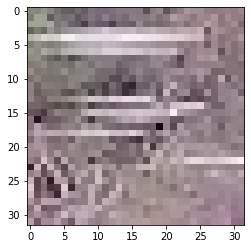

In [29]:
import matplotlib.pyplot as plt

print(labels[0])
plt.imshow(images[0])

1


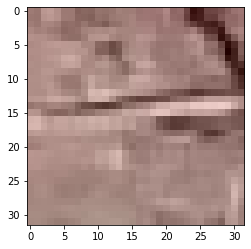

In [30]:
print(labels[1001])
plt.imshow(images[1001])

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=10)

In [33]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(15750, 32, 32, 3) (1750, 32, 32, 3) (15750, 2) (1750, 2)


In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(Input((32, 32, 3)))

model.add(Conv2D(16, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(32, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization(axis=3))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train_req, validation_split=0.1, epochs=30, batch_size=32)

Epoch 1/30
443/443 [==============================] - 4s 9ms/step - loss: 0.1330 - accuracy: 0.9503 - val_loss: 3.0722 - val_accuracy: 0.7498
Epoch 2/30
443/443 [==============================] - 4s 8ms/step - loss: 0.0791 - accuracy: 0.9719 - val_loss: 0.3052 - val_accuracy: 0.8540
Epoch 3/30
443/443 [==============================] - 3s 8ms/step - loss: 0.0485 - accuracy: 0.9829 - val_loss: 0.2992 - val_accuracy: 0.8692
Epoch 4/30
443/443 [==============================] - 3s 8ms/step - loss: 0.0408 - accuracy: 0.9865 - val_loss: 0.0324 - val_accuracy: 0.9917
Epoch 5/30
443/443 [==============================] - 3s 8ms/step - loss: 0.0307 - accuracy: 0.9893 - val_loss: 0.2033 - val_accuracy: 0.9244
Epoch 6/30
443/443 [==============================] - 4s 8ms/step - loss: 0.0264 - accuracy: 0.9907 - val_loss: 0.3227 - val_accuracy: 0.8927
Epoch 7/30
443/443 [==============================] - 3s 8ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.2345 - val_accuracy: 0.9378
Epoch 

In [39]:
model.evaluate(X_test, Y_test_req)

55/55 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9886


[0.0570068284869194, 0.9885714054107666]

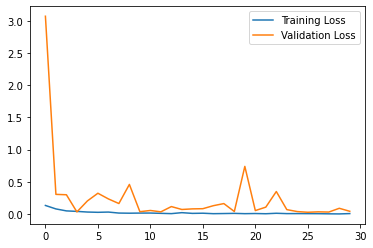

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

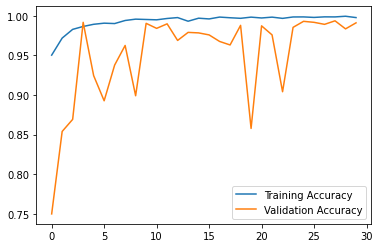

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')

In [43]:
dictionary = {}
id = []
has_cactus = []

for images in os.listdir('/content/drive/My Drive/Colab Notebooks/Aerial Cactus identification/test/'):

  image = cv.imread('/content/drive/My Drive/Colab Notebooks/Aerial Cactus identification/test/' + images)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image = cv.resize(image, (32, 32))
  image = image.astype('float32')/255.0
  image = image.reshape((1, 32, 32, 3))

  prediction = model.predict_classes(image)[0]

  id.append(images)
  has_cactus.append(prediction)


dictionary['id'] = id
dictionary['has_cactus'] = has_cactus

In [44]:
sub_df = pd.DataFrame(dictionary)
sub_df.head()

,id,has_cactus
0,e3f0ecacde01a12eb82ea91017682d53.jpg,1
1,e43b0f272e0d5ff7aaf0812738331643.jpg,1
2,e3cf3730a09e4f0267ba7b1c21c4b707.jpg,1
3,e3d1e1b38264c74a2f9b4aab9398d5c0.jpg,0
4,e4531911f1176c47d7caa585cf65d01c.jpg,1


In [46]:
sub_df.to_csv('/content/drive/My Drive/Colab Notebooks/Aerial Cactus identification/submission.csv')